## Chapter 2: Linear regression

#### The Normal Equation

In [1]:
#create datasets
import numpy as np

X = 2 * np.random.rand(100,1)
#print(len(X))
y = 4 + 3*X + np.random.randn(100,1)
print(len(y))

100


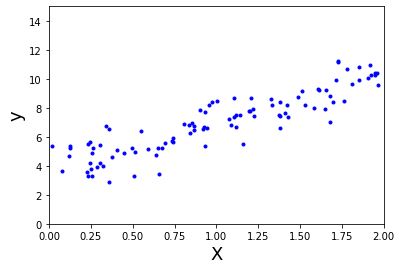

In [2]:
#visualization
import matplotlib.pyplot as plt
plt.plot(X,y,"b.")
plt.xlabel("X",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [3]:
#prepare data
X_b = np.c_[np.ones((100,1)),X] #add x0 =1 to each instance
#print(X)
#print(X_b)

In [4]:
#The normal equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
#y = 4 + 3*X
print(theta)

[[3.66157633]
 [3.3018452 ]]


In [6]:
#predict
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
#print(X_new_b)
y_predict = X_new_b.dot(theta)
y_predict

array([[ 3.66157633],
       [10.26526673]])

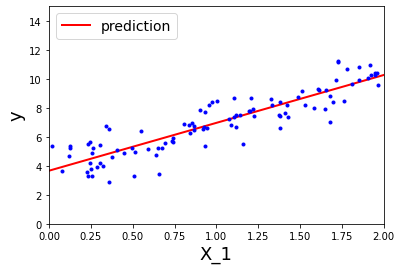

In [7]:
#visualization
plt.plot(X_new,y_predict,"r-",linewidth=2,label="prediction")
plt.plot(X,y,"b.")
plt.xlabel("X_1",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.legend(loc="upper left",fontsize=14)
plt.axis([0,2,0,15])
plt.show()

## SVD

In [8]:
#y = 4+3X
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.66157633]), array([[3.3018452]]))

## Gradient Descent

## Batch Gradient Descent

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = len(X_b)
print(m)
theta = np.random.randn(2,1) #random theta

for interation in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
    print(f"\nround:{interation}",theta)

100

round:0 [[0.60881656]
 [1.66603808]]

round:1 [[1.54928375]
 [2.72022701]]

round:2 [[2.08904504]
 [3.30215124]]

round:3 [[2.40348957]
 [3.61922275]]

round:4 [[2.59109712]
 [3.78788117]]

round:5 [[2.70716755]
 [3.87349134]]

round:6 [[2.78275773]
 [3.91274318]]

round:7 [[2.83531343]
 [3.92622781]]

round:8 [[2.87463837]
 [3.9254981 ]]

round:9 [[2.90624549]
 [3.91703281]]

round:10 [[2.93323849]
 [3.90446211]]

round:11 [[2.9573682]
 [3.8898171]]

round:12 [[2.97962562]
 [3.87423129]]

round:13 [[3.00057495]
 [3.8583345 ]]

round:14 [[3.02054054]
 [3.84247389]]

round:15 [[3.03971183]
 [3.82683819]]

round:16 [[3.05820233]
 [3.81152729]]

round:17 [[3.07608269]
 [3.79659143]]

round:18 [[3.09339928]
 [3.78205314]]

round:19 [[3.11018469]
 [3.76791954]]

round:20 [[3.12646354]
 [3.75418928]]

round:21 [[3.14225578]
 [3.74085641]]

round:22 [[3.15757859]
 [3.72791254]]

round:23 [[3.1724474 ]
 [3.71534807]]

round:24 [[3.1868765 ]
 [3.70315287]]

round:25 [[3.20087934]
 [3.69131

In [10]:
#y = 4 + 3X
theta

array([[3.66157633],
       [3.3018452 ]])

In [11]:
#predicting
X_new_b.dot(theta)

array([[ 3.66157633],
       [10.26526673]])

## Example

- change learning rate and visualization
  -  0.02 
  -  0.1 
  -  0.5

In [12]:
def plot_gradient_descent(theta,eta):
    m = len(X_b)
    plt.plot(X,y,"b.")
    n_iterations = 1000
    for interation in range(n_iterations):
        if interation < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if interation > 0 else "r--"
            plt.plot(X_new,y_predict,style)
        gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients
    plt.xlabel("X_1",fontsize=18)
    plt.ylabel("y",fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(f"eta = {eta}",fontsize=16)
        

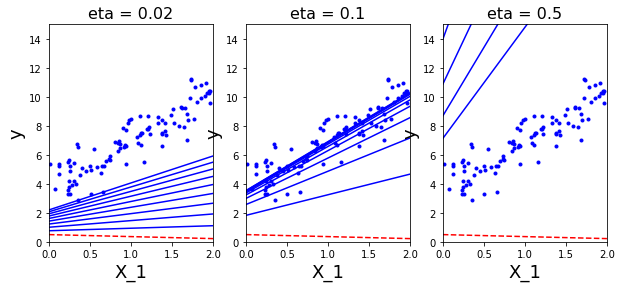

In [13]:
np.random.seed(42) # fixed random
theta = np.random.randn(2,1) #random theta

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta,eta=0.02)
plt.subplot(132)
plot_gradient_descent(theta,eta=0.1)
plt.subplot(133)
plot_gradient_descent(theta,eta=0.5)

## Stochastic Gradient Descent

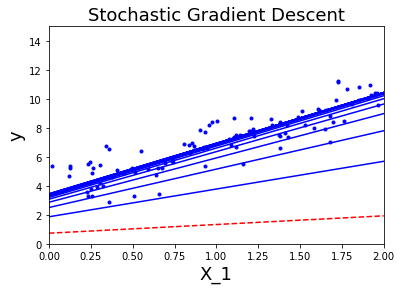

In [14]:
n_epochs = 50
m = len(X_b)
eta = 0.1

t0, t1 = 5,50  #learning rate hyperparameters

def learning_schedult(t):
    return t0 / (t+t1)

theta = np.random.rand(2,1)

for epoch in range(n_epochs):
    for i in  range(m):
        if epoch == 0 and i <20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new,y_predict,style)
        random_index = np.random.randint(m)  #sgd term
        xi = X_b[random_index:random_index+1] #sgd term
        yi = y[random_index:random_index+1]  #sgd term
        gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
        #eta = learning_schedult(epoch * m+i)  # learning rate dynamics
        theta = theta - eta*gradients
plt.plot(X,y,"b.")
plt.xlabel("X_1",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.axis([0,2,0,15])
plt.title("Stochastic Gradient Descent",fontsize= 18)
plt.show()

In [15]:
#y = 4+3X
theta

array([[3.66157633],
       [3.3018452 ]])

## SGD from sklearn

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50,eta0=0.1,random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, random_state=42)

In [17]:
#y = 4+3X
sgd_reg.intercept_ , sgd_reg.coef_

(array([3.66470148]), array([3.32868791]))

## Mini-batch gradient descent

In [18]:
n_iterations = 50
minibatch_size = 20

m = len(X_b)
np.random.seed(42)
theta = np.random.randn(2,1)
eta = 0.1

for interation in range(n_iterations):
    shuffed_indices = np.random.permutation(m) #shuffed data
    #print(shuffed_indices)
    X_b_shuffled = X_b[shuffed_indices]
    y_shuffled = y[shuffed_indices]
    for i in range(0,m,20):
        xi = X_b_shuffled[i:i+minibatch_size] #mini batch
        yi = y_shuffled[i:i+minibatch_size] # minibatch
        gradients = 2/minibatch_size*xi.T.dot(xi.dot(theta)-yi)
        theta = theta - eta*gradients



In [19]:
#y= 4+3X
theta

array([[3.64797077],
       [3.29829856]])

## Polynomial Regression

In [20]:
# making dataset
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [21]:
#y=  0.5*X^2 + X + 2
m = 100
X = 6*np.random.rand(m,1) -3
y = 0.5 * X**2 + X +2 + np.random.randn(m,1)

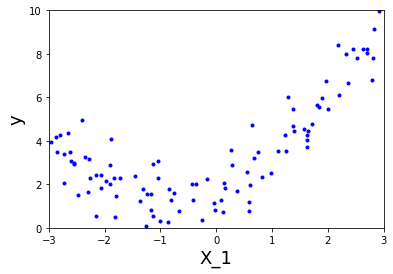

In [22]:
#visualization
plt.plot(X,y,"b.")
plt.xlabel("X_1",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [23]:
#preprocessing
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2 , include_bias=False)
X_poly = poly_features.fit_transform(X)

#print(X_poly)

In [24]:
# model selection
lin_reg = LinearRegression()

#training 
lin_reg.fit(X_poly,y)
lin_reg.intercept_ ,lin_reg.coef_  #y=  0.5*X^2 + X + 2

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

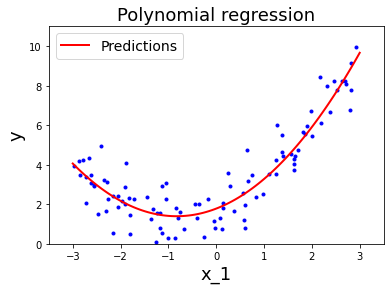

In [25]:
#Visualization
X_new = np.linspace(-3,3,100).reshape(100,1)
#print(X_new)
X_new_poly = poly_features.transform(X_new)
#print(X_new_poly)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.xlabel("x_1",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.legend(loc="upper left",fontsize=14)
plt.axis([-3.5,3.5,0,11])
plt.title("Polynomial regression",fontsize=18)
plt.show()

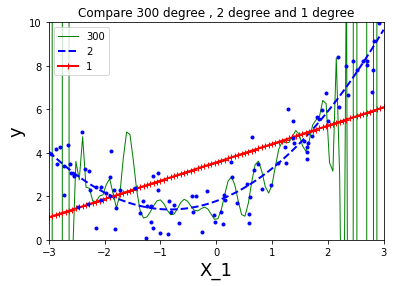

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style,width,degree in (("g-",1,300),("b--",2,2),("r-+",2,1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False) # 300 degree
    std_scaler = StandardScaler() #2 degree
    lin_reg = LinearRegression() #1 degree
    polymonial_regression = Pipeline([
        ("poly_features",poly_features),
        ("std_scaler",std_scaler),
        ("lin_reg",lin_reg)
    ])
    polymonial_regression.fit(X,y)
    y_newbig = polymonial_regression.predict(X_new)
    plt.plot(X_new,y_newbig,style,label=str(degree),linewidth=width)

plt.plot(X,y,"b.",linewidth=3)
plt.axis([-3,3,0,10])
plt.legend(loc="upper left")
plt.xlabel("X_1",fontsize=18)
plt.ylabel("y",fontsize=18)
plt.title("Compare 300 degree , 2 degree and 1 degree")
plt.show()

## Learning Curves

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val, y_train , y_val = train_test_split(X,y,test_size=0.2,random_state=10)
    train_errors , val_errors = [],[]
    for m in range(1,len(X_train)+1):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))

    plt.plot(np.sqrt(train_errors),"r-+",label="train",linewidth=2)
    plt.plot(np.sqrt(val_errors),"b-",label="val",linewidth=3)
    plt.legend(loc="upper right",fontsize=14)
    plt.xlabel("Training set size",fontsize=14)
    plt.ylabel("RMSE",fontsize=14)
    plt.axis([0,80,0,3])
    plt.show()

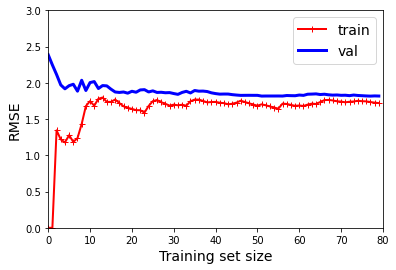

In [28]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

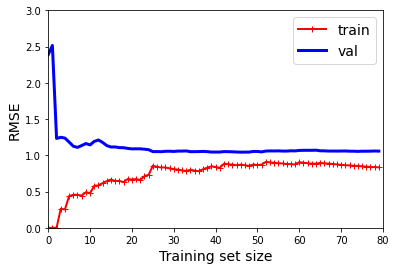

In [29]:
#2 degree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

polymonial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2,include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polymonial_regression,X,y)

## Regualized Linear models

## Ridge Regression

In [30]:
#datasets
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5*X + np.random.randn(m,1) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)


In [31]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,random_state=42)

ridge_reg.fit(X,y)

ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [32]:
#using SGD
sgd_reg = SGDRegressor(penalty="l2",alpha=1)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.39035756])

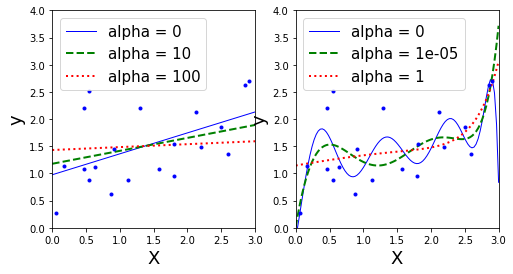

In [33]:
from sklearn.linear_model import Ridge

def plot_model(model_class,polynomial,alphas,**model_kargs):
    for alpha ,style in zip(alphas,("b-","g--","r:")):
        model = model_class(alpha,**model_kargs) if alpha >0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10,include_bias=False)),
                ("std_scaler",StandardScaler()),
                ("regul_reg",model),
            ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new,y_new_regul,style,linewidth=lw,label=f"alpha = {alpha}")
    plt.plot(X,y,"b.",linewidth=3)
    plt.legend(loc="upper left",fontsize=15)
    plt.xlabel("X",fontsize=18)
    plt.ylabel("y",fontsize=18)
    plt.axis([0,3,0,4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0,10,100),random_state=42) # 1st degree ==> 0 -> infinite
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1),random_state=42) #polynomial ==> 0-1


## Lasso Regression

In [34]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [37]:
# SGD
sgd_reg = SGDRegressor(penalty= "l1")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.46736859])

C:\Users\lbj6639\Miniconda3\envs\fml\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


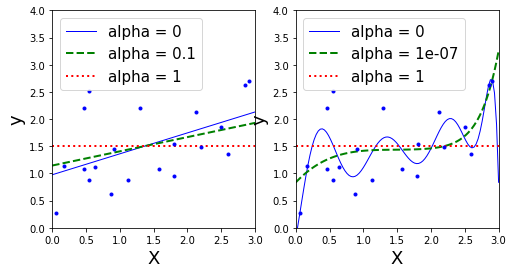

In [41]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas=(0,0.1,1),random_state=42)
plt.subplot(122)
plot_model(Lasso,polynomial=True,alphas=(0,10**-7,1),random_state=42)

## Elastic Net

In [43]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

In [51]:
#datasets
np.random.seed(42)
m = 100
X = 6 *np.random.rand(m,1) -3 
y = 2 + X +0.5*X**2 +np.random.randn(m,1)

X_train,X_val , y_train,y_val = train_test_split(X[:50],y[:50].ravel(),test_size=0.2,random_state=10)

print(len(X_train))

40


In [93]:
#best model
from copy import deepcopy

#preprocessing data
poly_scaler = Pipeline([
    ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scaler",StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

#select model
sgd_reg = SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005,random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_mode = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)
print(best_model)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)


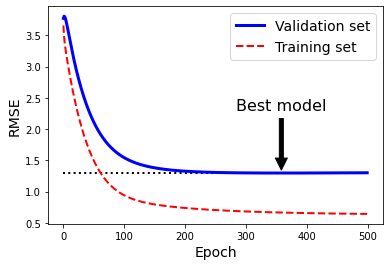

In [95]:
#best epochs

sgd_reg = SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005,random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])


plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()


In [96]:
best_epoch, best_model

(358,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))